<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [15]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


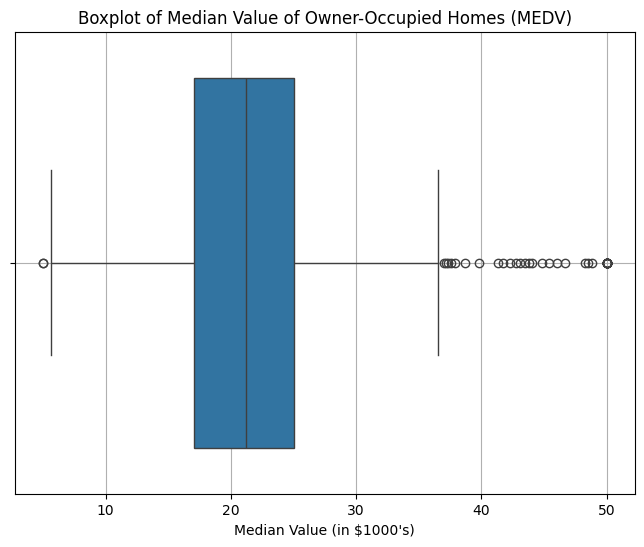

In [7]:
pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df["MEDV"])
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.xlabel("Median Value (in $1000's)")
pyplot.grid(True)
pyplot.show()

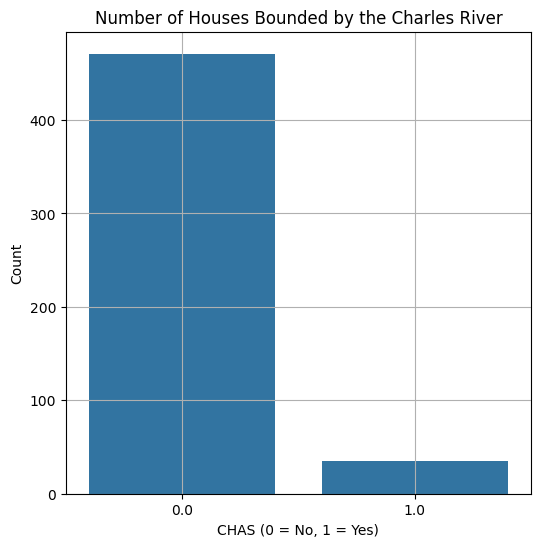

In [8]:
pyplot.figure(figsize=(6, 6))
sns.countplot(x="CHAS", data=boston_df)
pyplot.title("Number of Houses Bounded by the Charles River")
pyplot.xlabel("CHAS (0 = No, 1 = Yes)")
pyplot.ylabel("Count")
pyplot.grid(True)
pyplot.show()

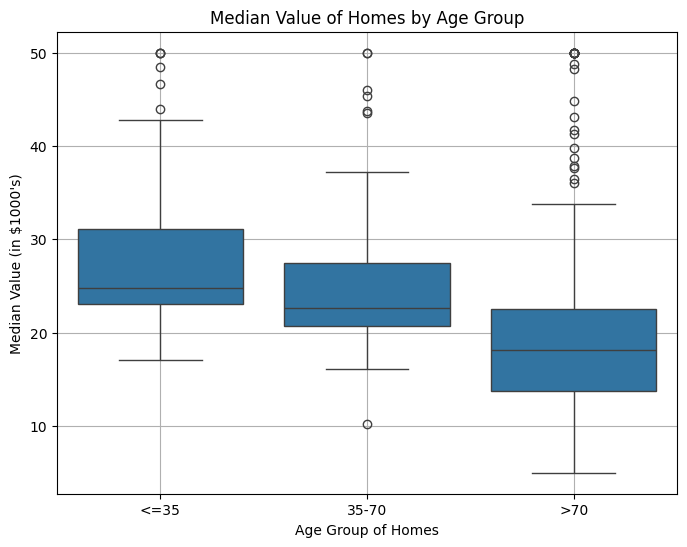

In [10]:
age_bins = [0, 35, 70, 100]
age_labels = ['<=35', '35-70', '>70']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

# Boxplot of MEDV vs AGE_GROUP
pyplot.figure(figsize=(8, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title("Median Value of Homes by Age Group")
pyplot.xlabel("Age Group of Homes")
pyplot.ylabel("Median Value (in $1000's)")
pyplot.grid(True)
pyplot.show()

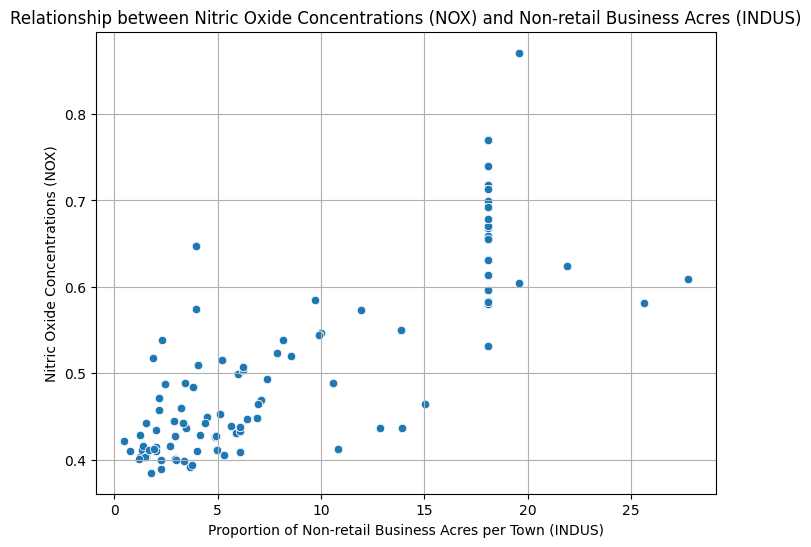

In [11]:
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title("Relationship between Nitric Oxide Concentrations (NOX) and Non-retail Business Acres (INDUS)")
pyplot.xlabel("Proportion of Non-retail Business Acres per Town (INDUS)")
pyplot.ylabel("Nitric Oxide Concentrations (NOX)")
pyplot.grid(True)
pyplot.show()

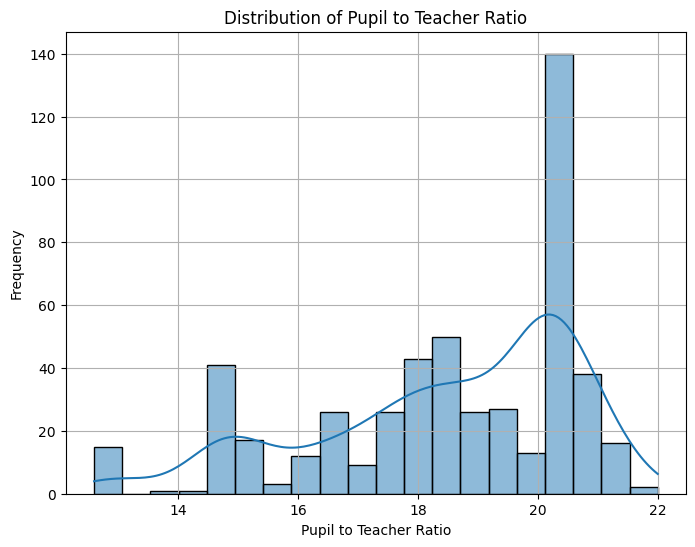

In [12]:
pyplot.figure(figsize=(8, 6))
sns.histplot(boston_df["PTRATIO"], bins=20, kde=True)
pyplot.title("Distribution of Pupil to Teacher Ratio")
pyplot.xlabel("Pupil to Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.grid(True)
pyplot.show()

In [16]:
# Hypotheses:
# H0: There is no difference in median home values between houses near the Charles River and those that are not.
# H1: There is a difference in median home values between houses near the Charles River and those that are not.

# Separate groups

medv_chas_1 = boston_df[boston_df["CHAS"] == 1]["MEDV"]
medv_chas_0 = boston_df[boston_df["CHAS"] == 0]["MEDV"]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(medv_chas_1, medv_chas_0)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant difference in median home values between houses near the Charles River and those that are not."
else:
    conclusion = "Fail to reject the null hypothesis: No significant difference in median home values between houses near the Charles River and those that are not."

print(conclusion)

T-statistic: 3.9964
P-value: 0.0001
Reject the null hypothesis: There is a significant difference in median home values between houses near the Charles River and those that are not.


In [17]:
# Discretize AGE variable into three groups
age_bins = [0, 35, 70, 100]
age_labels = ['<=35', '35-70', '>70']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

# Hypotheses:
# H0: There is no difference in median home values (MEDV) among different AGE groups.
# H1: There is a difference in median home values (MEDV) among different AGE groups.

# Perform one-way ANOVA
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '<=35']["MEDV"],
    boston_df[boston_df['AGE_GROUP'] == '35-70']["MEDV"],
    boston_df[boston_df['AGE_GROUP'] == '>70']["MEDV"]
)

print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4f}")

# Conclusion
if anova_result.pvalue < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant difference in median home values among different AGE groups."
else:
    conclusion = "Fail to reject the null hypothesis: No significant difference in median home values among different AGE groups."

print(conclusion)

F-statistic: 36.4076
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in median home values among different AGE groups.


In [18]:
# Hypotheses:
# H0: There is no linear relationship between NOX and INDUS.
# H1: There is a linear relationship between NOX and INDUS.

# Perform Pearson correlation test
corr_coef, p_value = stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

print(f"Correlation coefficient (r): {corr_coef:.4f}")
print(f"P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant linear relationship between NOX and INDUS."
else:
    conclusion = "Fail to reject the null hypothesis: No significant linear relationship between NOX and INDUS."

print(conclusion)

Correlation coefficient (r): 0.7637
P-value: 0.0000
Reject the null hypothesis: There is a significant linear relationship between NOX and INDUS.


In [19]:
# Hypotheses:
# H0: There is no effect of weighted distance to employment centers (DIS) on median home value (MEDV).
# H1: There is an effect of weighted distance to employment centers (DIS) on median home value (MEDV).

# Regression: MEDV ~ DIS
X = sm.add_constant(boston_df["DIS"])  # adding constant
y = boston_df["MEDV"]

model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion
p_value = model.pvalues["DIS"]

if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant effect of weighted distance to employment centers on median home value."
else:
    conclusion = "Fail to reject the null hypothesis: No significant effect of weighted distance to employment centers on median home value."

print(conclusion)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        15:45:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0